In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copy import copy
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import matplotlib.animation as animation
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

### Parameter setting for the model simulation

In [2]:
K = 100 # carrying capacity
a = 1 # birth rate of prey
b = 0.1 # death rate of prey due to predation
c = 0.02 # factor that describes how many eaten preys give birth to a new predator
d = 0.5 # natural death rate of predator

D_u = 0.1 # diffusion term for prey
D_v = 0.1 # diffusion term for predator

### Discrete time and space

In [3]:
dt = 0.5 #time step
end_time = 150 #total time
NT = int(end_time/dt) #number of time step
t = np.arange(0, end_time+dt, dt) # time postion

dx = 0.5 #space step
L = 100 # length of the spetial segment
NX = int(L/dx) # number of steps
x = np.arange(0, L+dx, dx) # space position

 ### Create prey and predator grids

In [4]:
n = len(x) 
m = len(t)
u = np.zeros((m,n,n))
v = np.zeros((m,n,n))

### Boundary Condition

In [5]:
# periodic boundary
#u[:,-1,:] = u[:,0,:] #top = bottom
#u[:,:,0] = u[:,:,-1] #right = left
#v[:,-1,:] = v[:,0,:]
#v[:,:,0] = v[:,:,-1]

# Neumann boundary condition
#boundaryCondition = [0,0,0,0] #boundary at top, left, bottom, right
#u[:,-1,:] = boundaryCondition[0] #top
#u[:,:,0] = boundaryCondition[1] #left
#u[:,0,:] = boundaryCondition[2] # bottom
#u[:,:,-1] = boundaryCondition[3] # right

#v[:,-1,:] = boundaryCondition[0] #top
#v[:,:,0] = boundaryCondition[1] #left
#v[:,0,:] = boundaryCondition[2] # bottom
#v[:,:,-1] = boundaryCondition[3] # right

### Initial Configuration

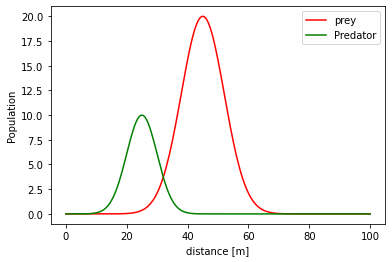

In [6]:
# both prey and predator initial distribution in space follows the normal distribution. 
u0=20*np.exp(-0.01*(x-45)**2)
v0=10*np.exp(-0.02*(x-25)**2)

u[0,:,:] = u0
v[0,:,:] = v0

#plot initial configuration
plt.plot(x,u0, 'r',label = 'prey')
plt.plot(x,v0, 'g', label = 'Predator')
plt.xlabel('distance [m]')
plt.ylabel('Population')
plt.legend()
plt.show()

### Solve PDE with eplicit method (Forward in time, symmetric in space)

In [7]:
F1 = D_u*(dt/dx**2)
F2 = D_v*(dt/dx**2)

def calculate(u): #prey population
    for k in range(1,m): #loop through time steps
        for i in range(n): #loop through space steps 
            for j in range(n): #loop through space steps 
                u[k,i,j] = (a*u[k-1,i%n,j%n] * (1-u[k-1,i%n,j%n]/K)- b*v[k-1,i%n,j%n]*u[k-1,i%n,j%n])*dt + F1*(u[k-1,(i+1)%n,j%n]+u[k-1,(i-1)%n,j%n]+u[k-1,i%n,(j+1)%n]+u[k-1,i%n,(j-1)%n]-4*u[k-1,i%n,j%n]) + u[k-1,i%n,j%n]
                v[k,i,j] = (v[k-1,i%n,j%n]*(c*u[k-1,i%n,j%n]-d))*dt + F2*(v[k-1,(i+1)%n,j%n]+v[k-1,(i-1)%n,j%n]+v[k-1,i%n,(j+1)%n]+v[k-1,i%n,(j-1)%n]-4*v[k-1,i%n,j%n]) + v[k-1,i%n,j%n]
    return u 

### Result

#### Visualisation of prey population with animation

Done!


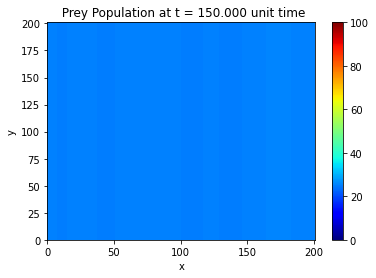

In [8]:
u= calculate(u)

def plotheatmap_u(u_k, k):
    # Clear the current plot figure
    plt.clf()

    plt.title(f" Prey Population at t = {k*dt:.3f} unit time")
    plt.xlabel("x")
    plt.ylabel("y")

    # This is to plot u_k (u at time-step k)
    plt.pcolormesh(u_k, cmap=plt.cm.jet, vmin=0, vmax=100)
    plt.colorbar()

    return plt


def animate(k):
    plotheatmap_u(u[k],k)

anim = animation.FuncAnimation(plt.figure(), animate, interval=10, frames= m, repeat=False)

display(HTML(anim.to_jshtml()))

#anim.save("Prey_population.gif")

print("Done!")

In [9]:
F1 = D_u*(dt/dx**2)
F2 = D_v*(dt/dx**2)

def calculate_v(v): #prey population
    for k in range(1,m): #loop through time steps
        for i in range(n): #loop through space steps 
            for j in range(n): #loop through space steps 
                u[k,i,j] = (a*u[k-1,i%n,j%n] * (1-u[k-1,i%n,j%n]/K)- b*v[k-1,i%n,j%n]*u[k-1,i%n,j%n])*dt + F1*(u[k-1,(i+1)%n,j%n]+u[k-1,(i-1)%n,j%n]+u[k-1,i%n,(j+1)%n]+u[k-1,i%n,(j-1)%n]-4*u[k-1,i%n,j%n]) + u[k-1,i%n,j%n]
                v[k,i,j] = (v[k-1,i%n,j%n]*(c*u[k-1,i%n,j%n]-d))*dt + F2*(v[k-1,(i+1)%n,j%n]+v[k-1,(i-1)%n,j%n]+v[k-1,i%n,(j+1)%n]+v[k-1,i%n,(j-1)%n]-4*v[k-1,i%n,j%n]) + v[k-1,i%n,j%n]                      
    return v 

In [10]:
#### Visualisation of predator population with animation

Done!


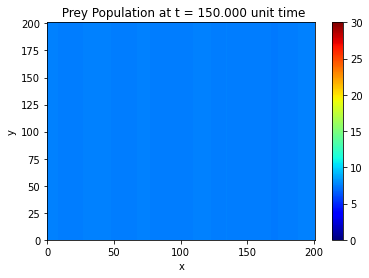

In [11]:
u[0,:,:] = u0
v[0,:,:] = v0

v= calculate_v(v)

def plotheatmap_v(v_k, k):
    # Clear the current plot figure
    plt.clf()

    plt.title(f" Prey Population at t = {k*dt:.3f} unit time")
    plt.xlabel("x")
    plt.ylabel("y")

    # This is to plot u_k (u at time-step k)
    plt.pcolormesh(v_k, cmap=plt.cm.jet, vmin=0, vmax=30)
    plt.colorbar()

    return plt


def animate_v(k):
    plotheatmap_v(v[k],k)

anim = animation.FuncAnimation(plt.figure(), animate_v, interval=10, frames= m, repeat=False)

display(HTML(anim.to_jshtml()))

#anim.save("Predator_population.gif")

print("Done!")